In [1]:
import pandas as pd
import ujson
import json
import constants
import pickle as pckl
json_surah_words = 'json-surah-words/'

In [2]:
# surah_df = pd.read_json(json_surah_words + '1.json')
# for i in range(2, 115):
#     cur_df = pd.read_json(json_surah_words + str(i) + '.json')
#     surah_df = pd.concat([surah_df, cur_df], ignore_index=True)
#     print(len(surah_df))


In [3]:
fh = open("surah_df.pckl","rb")
surah_df = pckl.load(fh)
fh.close()
surah_df.head(5)

answer                                         arabicAyah  \
0              (of) those   صِرَاطَ الَّذِينَ أَنْعَمْتَ عَلَيْهِمْ غَيْر...   
1              (of) Allah             بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ   
2           (be) to Allah              الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ   
3  All praises and thanks              الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ   
4       (of the) Judgment                            مَالِكِ يَوْمِ الدِّينِ   

   ayahnum  frequency  hasRootWord  pcklId   question   question_id rootWord  \
0        7       1464         True       0  الَّذِينَ  981575111091  ٱلَّذِى   
1        1       2851         True     147    اللَّهِ  748891323231    أ ل ه   
2        2       2851         True     148    لِلَّهِ  338108719184    أ ل ه   
3        2         63         True       1  الْحَمْدُ  787905890794    ح م د   
4        4        101         True       2   الدِّينِ  335755371025    د ي ن   

   rootWordId     rootWordType  surahayahnum  surahnum       tlit     wazn  \
0          59          nominal       1007002         1  alladhīna  ٱلَّذِى   
1          61  triliteral root       1001002         1     l-lahi   ٱللَّه   
2          61  triliteral root       1002002         1    lillahi   ٱللَّه   
3         352  triliteral root       1002001         1   al-ḥamdu    حَمْد   
4         498  triliteral root       1004003         1     l-dīni     دِين   

        waznEnglish  waznFreq waznTlit                    waznType  wordnum  
0  who, which, that      1464  alladhī  Nominal (Relative pronoun)        2  
1             Allah      2699    allah                 Proper noun        2  
2             Allah      2699    allah                 Proper noun        2  
3             False        43     ḥamd                        Noun        1  
4             False        92      dīn                        Noun        3

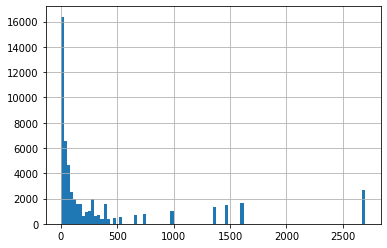

In [4]:
# surah_df[['ayahnum', 'frequency', 'rootWordId', 'tlit', 'waznType']]
df = surah_df[['rootWordId', 'waznEnglish', 'waznFreq', 'waznTlit', 'waznType']].copy(deep=True)

df['waznFreq'].hist(bins=100)

In [5]:
row = df.loc[(df['rootWordId'] == 59) & (df['waznType'] == 'Nominal (Relative pronoun)')]
row['score'] = 102
row

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


rootWordId       waznEnglish  waznFreq waznTlit  \
0              59  who, which, that      1464  alladhī   
362            59  who, which, that      1464  alladhī   
363            59  who, which, that      1464  alladhī   
364            59  who, which, that      1464  alladhī   
365            59  who, which, that      1464  alladhī   
...           ...               ...       ...      ...   
53809          59  who, which, that      1464  alladhī   
53810          59  who, which, that      1464  alladhī   
53811          59  who, which, that      1464  alladhī   
53812          59  who, which, that      1464  alladhī   
53907          59  who, which, that      1464  alladhī   

                         waznType  score  
0      Nominal (Relative pronoun)    102  
362    Nominal (Relative pronoun)    102  
363    Nominal (Relative pronoun)    102  
364    Nominal (Relative pronoun)    102  
365    Nominal (Relative pronoun)    102  
...                           ...    ...  
53809  Nominal (Relative pronoun)    102  
53810  Nominal (Relative pronoun)    102  
53811  Nominal (Relative pronoun)    102  
53812  Nominal (Relative pronoun)    102  
53907  Nominal (Relative pronoun)    102  

[1442 rows x 6 columns]

In [6]:
import numpy as np
df = df.drop_duplicates(['waznFreq', 'waznTlit'])
df["waznId"] = df["waznTlit"] + df["waznFreq"].astype(str)
df.head(20)

rootWordId       waznEnglish  waznFreq    waznTlit  \
0           59  who, which, that      1464     alladhī   
1           61             Allah      2699       allah   
3          352             False        43        ḥamd   
4          498             False        92         dīn   
5          524             False       975        rabb   
6          544             False        57      raḥmān   
8          544             False       116       raḥīm   
10         726             False        39        is'm   
11         836             False        45   ṣād rā ṭā   
13         891             False        14        ḍāll   
14         948        to worship       122      ʿabada   
15        1016             False        73     ʿālamīn   
16        1041      to seek help         4   is'taʿīnu   
17        1067             False         1     maghḍūb   
18        1095             False       147       ghayr   
19        1246             False        37   mus'taqīm   
20        1415             False         3       mālik   
21        1492   to bestow favor        17      anʿama   
22        1547          to guide       144        hadā   
23        1664             False       405  yā wāw mīm   

                                  waznType         waznId  
0               Nominal (Relative pronoun)    alladhī1464  
1                              Proper noun      allah2699  
3                                     Noun         ḥamd43  
4                                     Noun          dīn92  
5                                     Noun        rabb975  
6                      Nominal (Adjective)       raḥmān57  
8                      Nominal (Adjective)       raḥīm116  
10                                    Noun         is'm39  
11                                    Noun    ṣād rā ṭā45  
13                Active participle (Noun)         ḍāll14  
14                           Verb (form I)      ʿabada122  
15                                    Noun      ʿālamīn73  
16                           Verb (form X)     is'taʿīnu4  
17                      Passive participle       maghḍūb1  
18                          Nominal (Noun)       ghayr147  
19  Active participle (form X) (Adjective)    mus'taqīm37  
20                       Active participle         mālik3  
21                          Verb (form IV)       anʿama17  
22                           Verb (form I)        hadā144  
23                          Nominal (Noun)  yā wāw mīm405

In [7]:
with open('outputs/word-scores.json') as f:
    data = json.load(f)
data

{"(59, 'Nominal (Relative pronoun)')": 259.74551769217356,
 "(61, 'Proper noun')": 1064.6293888166451,
 "(352, 'Noun')": 18.725617685305593,
 "(498, 'Noun')": 76.44341800623012,
 "(524, 'Noun')": 421.32639791937584,
 "(544, 'Nominal (Adjective)')": 105.71428571428572,
 "(726, 'Noun')": 144.08322496749025,
 "(836, 'Noun')": 36.9515011510478,
 "(891, 'Active participle (Noun)')": 2.197802198241504,
 "(948, 'Verb (form I)')": 218.13471502590676,
 "(1016, 'Noun')": 73.86215864759428,
 "(1041, 'Verb (form X)')": 8.808290155440414,
 "(1067, 'Passive participle')": 0.46269519962979033,
 "(1095, 'Nominal (Noun)')": 25.563909779545916,
 "(1246, 'Active participle (form X) (Adjective)')": 10.854503463120292,
 "(1415, 'Active participle')": 4.387990761686926,
 "(1492, 'Verb (form IV)')": 3.2388663974085317,
 "(1547, 'Verb (form I)')": 100.92378751879929,
 "(1664, 'Nominal (Noun)')": 233.2563510159892,
 "(1, 'Proper noun')": 1.377173351557951,
 "(5, 'Time adverb')": 3.9949001286947734,
 "(6, 'Prop

In [32]:
df['score'] = 0
for i in range(len(df)):
    word_id = df.iloc[i,0]
    wazn_tlit = df.iloc[i,3]
    if '\'' in wazn_tlit:
        key = '(' + str(word_id) + ', "' + wazn_tlit + '")'
    else:
        key = "(" + str(word_id) + ", '" + wazn_tlit + "')"
    df.iloc[i,6] = data[key]
df = df.sort_values(by='score', ascending=False)
df

rootWordId                     waznEnglish  waznFreq    waznTlit  \
1154         172  to make commercial transaction         1     tabāyaʿ   
1723         494                    to carry out         1      tudīru   
1733         498                     to contract         1     tadāyan   
3074        1199                           False         2       aqsaṭ   
1449         330                           False         2     ḥāḍirat   
...          ...                             ...       ...         ...   
3111        1245                          to say      1618        qāla   
0             59                who, which, that      1464     alladhī   
23          1664                           False       405  yā wāw mīm   
5            524                           False       975        rabb   
1             61                           Allah      2699       allah   

                           waznType         waznId       score  
1154                 Verb (form VI)       tabāyaʿ1    0.000578  
1723                 Verb (form IV)        tudīru1    0.000578  
1733                 Verb (form VI)       tadāyan1    0.001156  
3074                           Noun         aqsaṭ2    0.001156  
1449  Active participle (Adjective)       ḥāḍirat2    0.001156  
...                             ...            ...         ...  
3111                  Verb (form I)       qāla1618  166.678001  
0        Nominal (Relative pronoun)    alladhī1464  206.293383  
23                   Nominal (Noun)  yā wāw mīm405  227.541590  
5                              Noun        rabb975  316.857440  
1                       Proper noun      allah2699  846.305931  

[4674 rows x 7 columns]

In [33]:
verb_df = df.copy(deep=True)
mask = df['waznType'].str.contains('Verb')
verb_df = df[mask]
other_df = df.copy(deep=True)
other_df = df[~mask]
other_df.head(20)

rootWordId        waznEnglish  waznFreq      waznTlit  \
1             61              Allah      2699         allah   
5            524              False       975          rabb   
23          1664              False       405    yā wāw mīm   
0             59   who, which, that      1464       alladhī   
3314        1256              False       260         kitāb   
8            544              False       116         raḥīm   
265           32    the Earth, land       461  hamza rā ḍād   
777           63  to, toward, until       742           ilā   
219           27               when       409          idhā   
4            498              False        92           dīn   
319           58              False       663          illā   
927           75              False       202        mu'min   
960           90              False       382   hamza yā yā   
6            544              False        57        raḥmān   
2728        1016              False       105         ʿil'm   
1174         173              False       266          bayn   
11           836              False        45     ṣād rā ṭā   
3996        1547              False        85         hudan   
2928        1130              False        21       muf'sid   
2556         968              False       322        ʿadhāb   

                                waznType           waznId       score  
1                            Proper noun        allah2699  846.305931  
5                                   Noun          rabb975  316.857440  
23                        Nominal (Noun)    yā wāw mīm405  227.541590  
0             Nominal (Relative pronoun)      alladhī1464  206.293383  
3314                                Noun         kitāb260   82.206035  
8                    Nominal (Adjective)         raḥīm116   74.012474  
265                                 Noun  hamza rā ḍād461   65.016196  
777                          Preposition           ilā742   58.682635  
219                Nominal (Time adverb)          idhā409   58.260065  
4                                   Noun            dīn92   53.974122  
319      Particle (Restriction particle)          illā663   52.928925  
927   Active participle (form IV) (Noun)        mu'min202   41.332427  
960                                 Noun   hamza yā yā382   39.374362  
6                    Nominal (Adjective)         raḥmān57   38.461538  
2728                                Noun         ʿil'm105   32.721713  
1174           Nominal (Location adverb)          bayn266   27.541653  
11                                  Noun      ṣād rā ṭā45   26.802218  
3996                                Noun          hudan85   26.742976  
2928         Active participle (form IV)        muf'sid21   26.141079  
2556                                Noun        ʿadhāb322   25.201770

In [34]:
prep_df = df.copy(deep=True)
mask = df['waznType'].str.contains('Nominal')
prep_df = df[mask]
prep_df

rootWordId       waznEnglish  waznFreq    waznTlit  \
23           1664             False       405  yā wāw mīm   
0              59  who, which, that      1464     alladhī   
8             544             False       116       raḥīm   
219            27              when       409        idhā   
6             544             False        57      raḥmān   
...           ...               ...       ...         ...   
13271        1570             False         4         hūn   
31383         118             False         4   mubārakat   
17724        1018             False         3      ʿul'yā   
2999         1174             False         4       qibal   
2405          887             False         8       ḍaʿīf   

                         waznType         waznId       score  
23                 Nominal (Noun)  yā wāw mīm405  227.541590  
0      Nominal (Relative pronoun)    alladhī1464  206.293383  
8             Nominal (Adjective)       raḥīm116   74.012474  
219         Nominal (Time adverb)        idhā409   58.260065  
6             Nominal (Adjective)       raḥmān57   38.461538  
...                           ...            ...         ...  
13271              Nominal (Noun)           hūn4    0.014609  
31383              Nominal (Noun)     mubārakat4    0.013850  
17724              Nominal (Noun)        ʿul'yā3    0.012976  
2999    Nominal (Location adverb)         qibal4    0.011898  
2405               Nominal (Noun)         ḍaʿīf8    0.004625  

[199 rows x 7 columns]

In [35]:
verb_df = verb_df.sort_values(by='score', ascending=False)
other_df['row'] = np.arange(float(len(other_df)))
verb_df['row'] = np.arange(float(len(verb_df)))
verb_df.head(21)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


rootWordId                       waznEnglish  waznFreq waznTlit  \
3111         1245                            to say      1618     qāla   
14            948                        to worship       122   ʿabada   
3475         1305                             to be      1358     kāna   
22           1547                          to guide       144     hadā   
856            75                        to believe       537    āmana   
73             12                           to give       271      ātā   
3387         1280                     to disbelieve       289   kafara   
3758         1460           to send down, to reveal       183   anzala   
2217          789    to be grateful, to give thanks        46  shakara   
1852          536                         to return        79   rajaʿa   
1774          523                            to see       271      raā   
1044          137   to raise, to resurrect, to send        52  baʿatha   
53796          56           familiarising, securing         2     ilāf   
2653         1016                           to know       382   ʿalima   
1626          431                         to create       184  khalaqa   
2629         1008             to forgive, to pardon        27     ʿafā   
1904          555                           to send       130   arsala   
3365         1263                to deny, to reject       176  kadhaba   
3364         1263                   to deny, to lie        11  kadhaba   
4107         1641  to be righteous, to fear (Allah)       166   ittaqā   
1245          190                to repent, to turn        63     tāba   

                    waznType      waznId       score   row  
3111           Verb (form I)    qāla1618  166.678001   0.0  
14             Verb (form I)   ʿabada122  160.995851   1.0  
3475           Verb (form I)    kāna1358   84.715079   2.0  
22             Verb (form I)     hadā144   80.221811   3.0  
856           Verb (form IV)    āmana537   55.389323   4.0  
73            Verb (form IV)      ātā271   37.899121   5.0  
3387           Verb (form I)   kafara289   29.751785   6.0  
3758          Verb (form IV)   anzala183   28.995315   7.0  
2217           Verb (form I)   shakara46   26.247689   8.0  
1852           Verb (form I)    rajaʿa79   25.702393   9.0  
1774           Verb (form I)      raā271   17.342111  10.0  
1044           Verb (form I)   baʿatha52   16.441207  11.0  
53796  Verbal noun (form IV)       ilāf2   16.393443  12.0  
2653           Verb (form I)   ʿalima382   16.085939  13.0  
1626           Verb (form I)  khalaqa184   15.048165  14.0  
2629           Verb (form I)      ʿafā27   14.972274  15.0  
1904          Verb (form IV)   arsala130   13.464808  16.0  
3365          Verb (form II)  kadhaba176   13.063156  17.0  
3364           Verb (form I)   kadhaba11   13.063156  18.0  
4107        Verb (form VIII)   ittaqā166   13.017443  19.0  
1245           Verb (form I)      tāba63   12.848402  20.0

In [36]:
verb_df['level'] = 0
verb_df.iloc[:140,8] = (np.ceil(verb_df['row'] / 7) * 7) / 7
verb_df.iloc[:140,8] = verb_df.iloc[:140,8].astype(int)
verb_df.iloc[140:,8] = (np.ceil(verb_df['row'] / 20) * 20) / 20
verb_df.iloc[140:,8] = verb_df.iloc[140:,8].astype(int)
verb_df

rootWordId                     waznEnglish  waznFreq       waznTlit  \
3111        1245                          to say      1618           qāla   
14           948                      to worship       122         ʿabada   
3475        1305                           to be      1358           kāna   
22          1547                        to guide       144           hadā   
856           75                      to believe       537          āmana   
...          ...                             ...       ...            ...   
3797        1472                        to raise         1       nunshizu   
2012         648                         to tire         3  sīn hamza mīm   
1733         498                     to contract         1        tadāyan   
1723         494                    to carry out         1         tudīru   
1154         172  to make commercial transaction         1        tabāyaʿ   

            waznType          waznId       score     row  level  
3111   Verb (form I)        qāla1618  166.678001     0.0    0.0  
14     Verb (form I)       ʿabada122  160.995851     1.0    1.0  
3475   Verb (form I)        kāna1358   84.715079     2.0    1.0  
22     Verb (form I)         hadā144   80.221811     3.0    1.0  
856   Verb (form IV)        āmana537   55.389323     4.0    1.0  
...              ...             ...         ...     ...    ...  
3797  Verb (form IV)       nunshizu1    0.001849  1644.0   83.0  
2012   Verb (form I)  sīn hamza mīm3    0.001734  1645.0   83.0  
1733  Verb (form VI)        tadāyan1    0.001156  1646.0   83.0  
1723  Verb (form IV)         tudīru1    0.000578  1647.0   83.0  
1154  Verb (form VI)        tabāyaʿ1    0.000578  1648.0   83.0  

[1649 rows x 9 columns]

In [37]:
other_df['level'] = 0
other_df.iloc[:140,8] = (np.ceil(other_df['row'] / 7) * 7) / 7
other_df.iloc[:140,8] = other_df.iloc[:140,8].astype(int)
other_df.iloc[140:,8] = (np.ceil(other_df['row'] / 20) * 20) / 20
other_df.iloc[140:,8] = other_df.iloc[140:,8].astype(int)
other_df

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


rootWordId       waznEnglish  waznFreq    waznTlit  \
1              61             Allah      2699       allah   
5             524             False       975        rabb   
23           1664             False       405  yā wāw mīm   
0              59  who, which, that      1464     alladhī   
3314         1256             False       260       kitāb   
...           ...               ...       ...         ...   
31187          31   physical desire         1      ir'bat   
31538         435             False         1      khumur   
2335          843             False         3      ṣaghīr   
1449          330             False         2     ḥāḍirat   
3074         1199             False         2       aqsaṭ   

                            waznType         waznId       score     row  level  
1                        Proper noun      allah2699  846.305931     0.0    0.0  
5                               Noun        rabb975  316.857440     1.0    1.0  
23                    Nominal (Noun)  yā wāw mīm405  227.541590     2.0    1.0  
0         Nominal (Relative pronoun)    alladhī1464  206.293383     3.0    1.0  
3314                            Noun       kitāb260   82.206035     4.0    1.0  
...                              ...            ...         ...     ...    ...  
31187                           Noun        ir'bat1    0.001849  3020.0  151.0  
31538                           Noun        khumur1    0.001849  3021.0  152.0  
2335                            Noun        ṣaghīr3    0.001734  3022.0  152.0  
1449   Active participle (Adjective)       ḥāḍirat2    0.001156  3023.0  152.0  
3074                            Noun         aqsaṭ2    0.001156  3024.0  152.0  

[3025 rows x 9 columns]

In [38]:
verb_levels=verb_df[['waznId', 'level']].copy(deep=True)
t1=verb_levels.head()
verb_levels

waznId  level
3111        qāla1618    0.0
14         ʿabada122    1.0
3475        kāna1358    1.0
22           hadā144    1.0
856         āmana537    1.0
...              ...    ...
3797       nunshizu1   83.0
2012  sīn hamza mīm3   83.0
1733        tadāyan1   83.0
1723         tudīru1   83.0
1154        tabāyaʿ1   83.0

[1649 rows x 2 columns]

In [39]:
other_levels=other_df[['waznId', 'level']].copy(deep=True)
other_t1=other_levels.head()
other_levels

waznId  level
1          allah2699    0.0
5            rabb975    1.0
23     yā wāw mīm405    1.0
0        alladhī1464    1.0
3314        kitāb260    1.0
...              ...    ...
31187        ir'bat1  151.0
31538        khumur1  152.0
2335         ṣaghīr3  152.0
1449        ḥāḍirat2  152.0
3074          aqsaṭ2  152.0

[3025 rows x 2 columns]

In [40]:
surah_df['waznId'] = surah_df["waznTlit"] + surah_df["waznFreq"].astype(str)
t2=surah_df.head()

In [41]:
t1

waznId  level
3111   qāla1618    0.0
14    ʿabada122    1.0
3475   kāna1358    1.0
22      hadā144    1.0
856    āmana537    1.0

In [42]:
t2

answer                                         arabicAyah  \
0              (of) those   صِرَاطَ الَّذِينَ أَنْعَمْتَ عَلَيْهِمْ غَيْر...   
1              (of) Allah             بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ   
2           (be) to Allah              الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ   
3  All praises and thanks              الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ   
4       (of the) Judgment                            مَالِكِ يَوْمِ الدِّينِ   

   ayahnum  frequency  hasRootWord  pcklId   question   question_id rootWord  \
0        7       1464         True       0  الَّذِينَ  684993489923  ٱلَّذِى   
1        1       2851         True     147    اللَّهِ  721205197745    أ ل ه   
2        2       2851         True     148    لِلَّهِ  254978174480    أ ل ه   
3        2         63         True       1  الْحَمْدُ   18137605195    ح م د   
4        4        101         True       2   الدِّينِ  729223599726    د ي ن   

   rootWordId  ... surahayahnum  surahnum       tlit     wazn  \
0          59  ...          172         1  alladhīna  ٱلَّذِى   
1          61  ...          112         1     l-lahi   ٱللَّه   
2          61  ...          122         1    lillahi   ٱللَّه   
3         352  ...          121         1   al-ḥamdu    حَمْد   
4         498  ...          143         1     l-dīni     دِين   

        waznEnglish waznFreq  waznTlit                    waznType wordnum  \
0  who, which, that     1464   alladhī  Nominal (Relative pronoun)       2   
1             Allah     2699     allah                 Proper noun       2   
2             Allah     2699     allah                 Proper noun       2   
3             False       43      ḥamd                        Noun       1   
4             False       92       dīn                        Noun       3   

        waznId  
0  alladhī1464  
1    allah2699  
2    allah2699  
3       ḥamd43  
4        dīn92  

[5 rows x 21 columns]

In [43]:
swl = surah_df.merge(verb_levels).copy(deep=True)
swl = surah_df.merge(other_levels).copy(deep=True)

In [44]:
swl[['question_id', 'level']]
output = swl.groupby('level').question_id.apply(lambda x: ','.join(map(str, x))).reset_index()
output.loc[:,'question_id'] = output.loc[:, 'question_id'].apply(lambda x: [int(y) for y in x.split(",")])
# levels_dict = output.set_index('level').to_dict()
# levels_dict
output.head()

level                                        question_id
0    0.0  [721205197745, 254978174480, 63953482887, 1455...
1    1.0  [684993489923, 868500313069, 274137369519, 111...
2    2.0  [729223599726, 336208648150, 527764216210, 852...
3    3.0  [927658428358, 326292614506, 413857476345, 249...
4    4.0  [475869827574, 657445305028, 463187066790, 785...

In [45]:
levels_dict = []
for index, row in output.iterrows():
    levels_dict.append({"level": row['level'], "question_ids": row['question_id']})
levels_dict

[{'level': 0.0,
  'question_ids': [721205197745,
   254978174480,
   63953482887,
   145533059410,
   91822999341,
   49612433120,
   71380728193,
   490178560239,
   833941507830,
   968296774629,
   120789524898,
   230306235538,
   697111462832,
   384765662131,
   982604683194,
   421291606027,
   886497463819,
   810682568210,
   880171429964,
   790896347946,
   349470373537,
   110997255760,
   86291137196,
   679413031838,
   69191232551,
   858488827988,
   447600764946,
   777727017296,
   912185880580,
   947695878208,
   10327430531,
   13254753033,
   137175317179,
   711832559152,
   224770050401,
   672964310961,
   746260286840,
   820417982646,
   179018380792,
   102218253864,
   487829574329,
   319078977378,
   608273461110,
   902433122514,
   190516894282,
   408429482529,
   430773280567,
   556096068592,
   214289805408,
   757632838629,
   406162242844,
   728402198427,
   156006838448,
   964294341798,
   760028933627,
   792271735689,
   729383660548,
   6895

In [46]:
import ujson
with open("outputs/wazn_levels.json", 'w') as f:
    ujson.dump(levels_dict, f, ensure_ascii=False, indent=4)